<a href="https://colab.research.google.com/github/huynguyeny2/Facial-Recognition/blob/main/Facial_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Detection**

-------------
## **Context**
-------------
Deep Learning has found applications in many predictive tasks relating to more unstructured forms
of data over the last few years, such as images, text, audio and video. Many of these tasks seem to
be in the vein of a larger direction of predictive modeling that aims to match human-level
performance on such tasks, because humans have evolved to specialize in performing intelligent
actions on such unstructured data. As a specific branch of AI (also called Affective Computing or
Emotion AI) Artificial Emotional Intelligence stands for the study and development of technologies
and computers that can read human emotions by means of analyzing body gestures, facial
expressions, voice tone, etc. and react appropriately to them.

In the field of human-machine interaction, facial expression recognition is critical. From recent
research, it has been found that as much as 55% of communication of sentiment takes place
through facial expressions and other visual cues. Therefore, training a model to identify facial
emotions accurately is an important step towards the development of emotionally intelligent
behavior in machines with AI capabilities. Automatic facial expression recognition systems could
have many applications, including but not limited to any use case that requires human behavior
understanding, detection of mental disorders, and creating a higher quality of virtual assistant for customer-facing businesses.

-------------
## **Objective**
-------------
The goal of this project is to use Deep Learning and Artificial Intelligence techniques to create a
computer vision model that can accurately detect facial emotions. The model should be able to
perform multi-class classification on images of facial expressions, to classify the expressions
according to the associated emotion.

-------------
## **About the dataset**
-------------
The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:
- ‘happy’: Images of people who have happy facial expressions.
-  ‘sad’: Images of people with sad or upset facial expressions.
- ‘surprise’: Images of people who have shocked or surprised facial expressions.
- ‘neutral’: Images of people showing no prominent emotion in their facial expression at all.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Facial_emotion_images.zip to Facial_emotion_images.zip


In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import os

import zipfile

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras import optimizers

from tensorflow.keras.utils import to_categorical

from keras.applications.vgg16 import VGG16

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import img_to_array, load_img

from tensorflow.keras.optimizers import Adam, SGD, RMSprop

## TF Version Check

In [ ]:
print(tf.__version__)

2.12.0


## Loading the Dataset

In [ ]:
# Storing the path of the data file from the Google drive
path = 'Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## Visualization

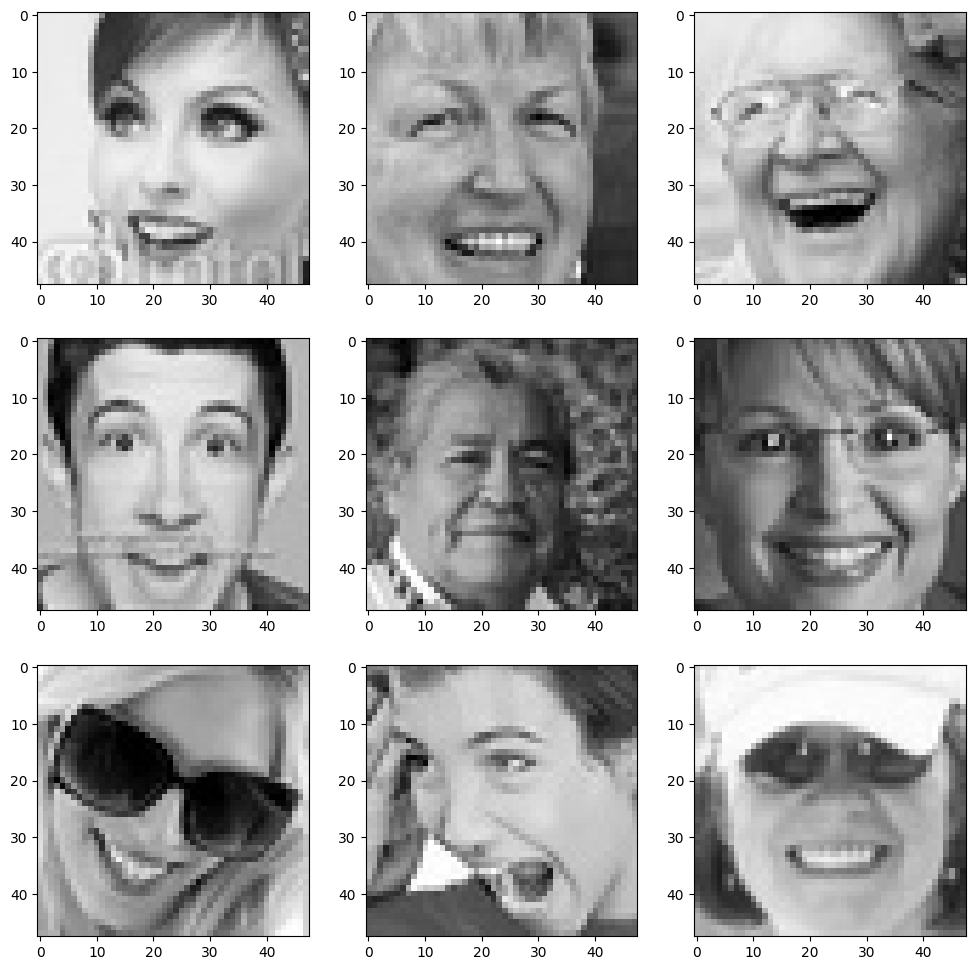

In [ ]:
# Visualizing Happy facial type
facial_expression = 'happy'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + facial_expression + "/" +
                  os.listdir(folder_path + "train/" + facial_expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

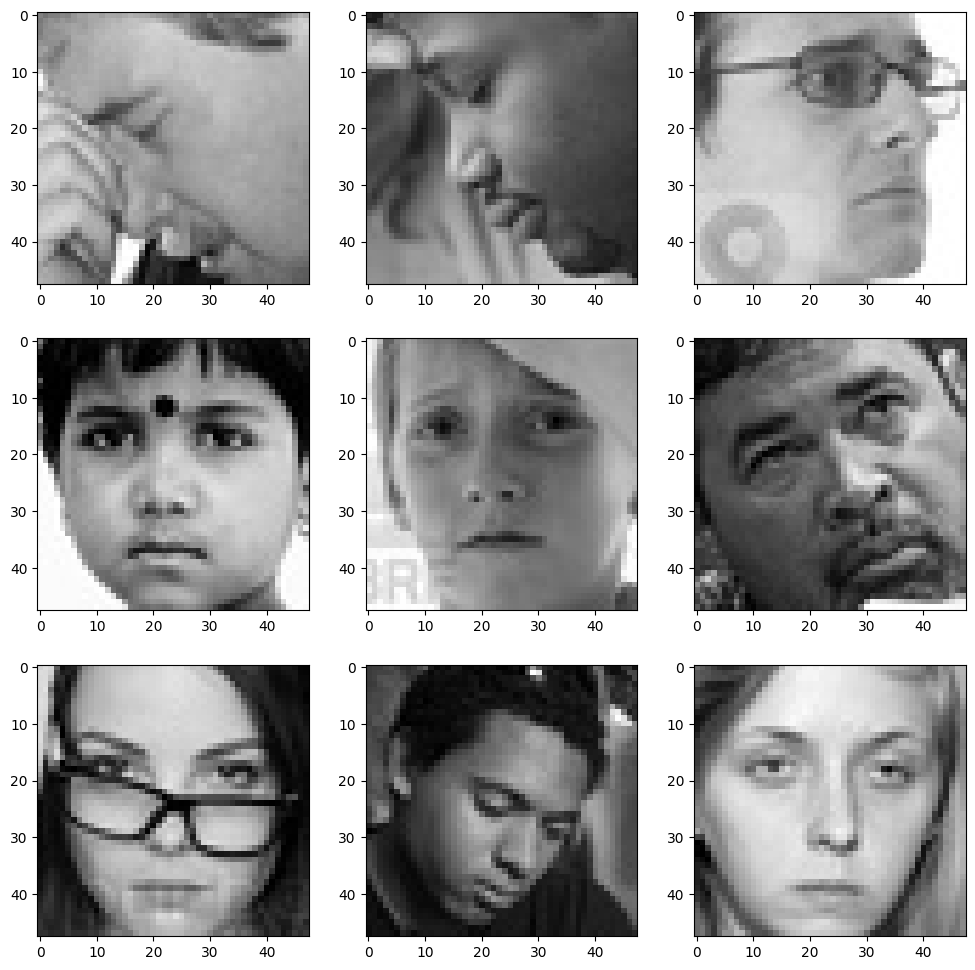

In [ ]:
# Visualizing sad facial type
facial_expression = 'sad'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + facial_expression + "/" +
                  os.listdir(folder_path + "train/" + facial_expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

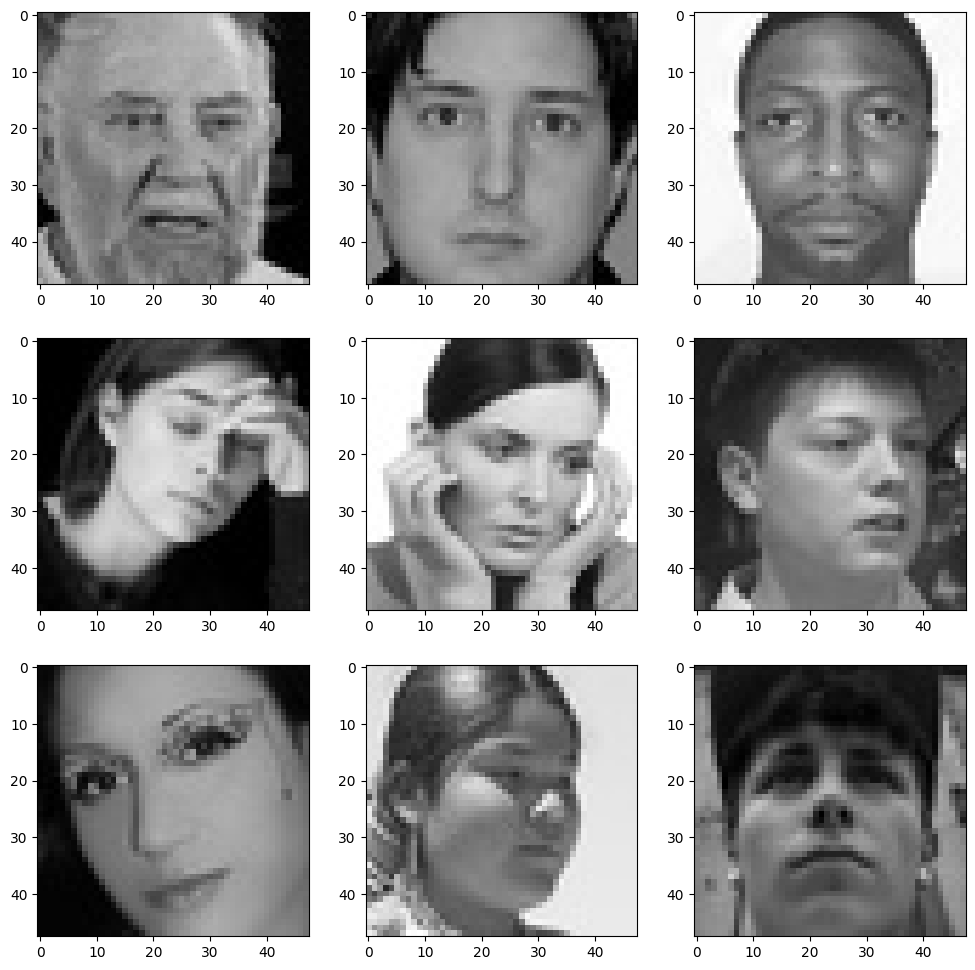

In [ ]:
# Visualizing Neutral facial type
facial_expression = 'neutral'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + facial_expression + "/" +
                  os.listdir(folder_path + "train/" + facial_expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

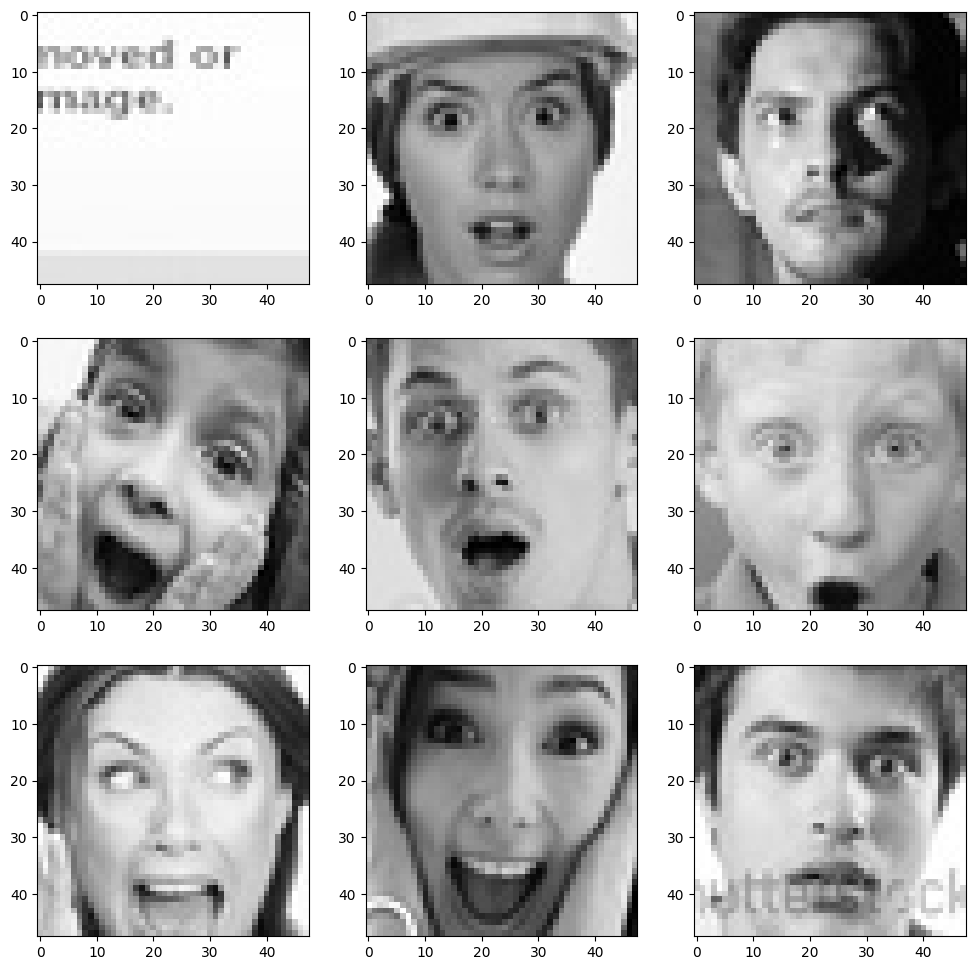

In [ ]:
# Visualizing Suprise facial type
facial_expression = 'surprise'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + facial_expression + "/" +
                  os.listdir(folder_path + "train/" + facial_expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

In [ ]:
# Distribution of Classes
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy'\t:", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad'\t:", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral' :", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':", num_surprise)

Number of images in the class 'happy'	: 3976
Number of images in the class 'sad'	: 3982
Number of images in the class 'neutral' : 3978
Number of images in the class 'surprise': 3173


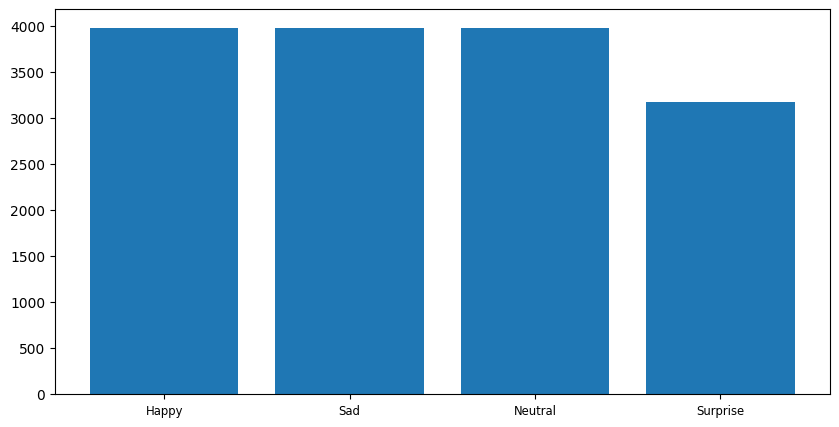

In [ ]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

## **Observations:**
- Classes of facial expressions are distributed mostly equally. The emotion of Surprise is less than other emotions by about 800.Imbalances can lead to potential inaccuracy with predictions, poor generalization, and loss of emotion specificity.
- Happy emotions include faces with open mouth that is crescent-shaped,and photos tend to have the subject looking up.

- Sad faces expressed with crunched up face,contorted mouth, and looking downward (mostly).

- With neutral faces, there are mixed emotions with crescent shaped lips-shaped. One photo with widened-eyes and open mouth.

- Suprise faces contain emotions with mouth open typically with widened eyes.

In [ ]:
batch_size  = 32
img_size = 48

datagen_train  = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)
datagen_val = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)
datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

validation_set = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

test_set = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [ ]:
annmodel_1 = Sequential([

    # Adding Flatten layer
    Flatten(input_shape = (48, 48, 1)),

    # Dense or Fully Connected Layers
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),

    # Classifier
    Dense(4, activation = 'softmax')
])

# Compiling the model
annmodel_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',  metrics = ['accuracy'])

# Printing out the model summary
annmodel_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 512)               1180160   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 1,312,516
Trainable params: 1,312,516
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = annmodel_1.fit(train_set, validation_data = validation_set, epochs = 2)

Epoch 1/2
473/473 [==============================] - 26s 42ms/step - loss: 1.4089 - accuracy: 0.3141 - val_loss: 1.2827 - val_accuracy: 0.4147
Epoch 2/2
473/473 [==============================] - 18s 38ms/step - loss: 1.2966 - accuracy: 0.3880 - val_loss: 1.2574 - val_accuracy: 0.4119


In [ ]:
test_images, test_labels = next(test_set)
accuracy = annmodel_1.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - loss: 1.3087 - accuracy: 0.2812 - 26ms/epoch - 26ms/step


## **Observations:**
- The ANN or fully connected model has given an accuracy of about 38% on the training data. This could be noises that could lead the model to learn incorrect patterns. If the training data contains biases, the neural network may learn and perpetuate these biases, leading to inaccurate predictions or classifications.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Initializing a Sequential Model
modelBase = Sequential()

# Add the first Convolutional block
modelBase.add(Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=(48, 48, 1)))
modelBase.add(MaxPooling2D(pool_size=(2, 2)))
modelBase.add(Dropout(0.2))

# Add the second Convolutional block
modelBase.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
modelBase.add(MaxPooling2D(pool_size=(2, 2)))
modelBase.add(Dropout(0.2))

# Add the third Convolutional block
modelBase.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
modelBase.add(MaxPooling2D(pool_size=(2, 2)))
modelBase.add(Dropout(0.2))

# Add the Flatten layer
modelBase.add(Flatten())

# Add the first Dense layer
modelBase.add(Dense(512, activation='relu'))
modelBase.add(Dropout(0.4))

# Add the Final layer
modelBase.add(Dense(4, activation='softmax'))

# Classifier
modelBase.add(Dense(4, activation = 'softmax'))

adam = optimizers.Adam(learning_rate = 0.001)

modelBase.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)       

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./modelBase.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
# Compiling the model
modelBase.compile(loss ='categorical_crossentropy', optimizer = adam , metrics = ['accuracy'])

In [ ]:
# Fitting the model
historyBase = modelBase.fit(train_set, validation_data = validation_set, epochs = 20)

Epoch 1/20
473/473 [==============================] - 28s 44ms/step - loss: 1.3984 - accuracy: 0.2445 - val_loss: 1.3861 - val_accuracy: 0.2289
Epoch 2/20
473/473 [==============================] - 19s 41ms/step - loss: 1.3765 - accuracy: 0.2907 - val_loss: 1.3554 - val_accuracy: 0.3673
Epoch 3/20
473/473 [==============================] - 20s 41ms/step - loss: 1.3579 - accuracy: 0.3248 - val_loss: 1.2883 - val_accuracy: 0.4027
Epoch 4/20
473/473 [==============================] - 19s 40ms/step - loss: 1.3212 - accuracy: 0.3599 - val_loss: 1.2983 - val_accuracy: 0.4131
Epoch 5/20
473/473 [==============================] - 20s 43ms/step - loss: 1.2795 - accuracy: 0.4182 - val_loss: 1.2056 - val_accuracy: 0.4899
Epoch 6/20
473/473 [==============================] - 20s 42ms/step - loss: 1.2386 - accuracy: 0.4411 - val_loss: 1.1687 - val_accuracy: 0.5049
Epoch 7/20
473/473 [==============================] - 19s 40ms/step - loss: 1.1981 - accuracy: 0.4634 - val_loss: 1.1286 - val_accuracy:

In [ ]:
 accuracyBase = modelBase.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - loss: 0.8113 - accuracy: 0.5625 - 21ms/epoch - 21ms/step


In [ ]:
model1 = Sequential()

# First Convolutional Block
model1.add(Conv2D(32, (3, 3), input_shape = (48, 48, 1), padding = 'same'))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(2, 2))

# Second Convolutional Block
model1.add(Conv2D(64, (3, 3), padding = 'same'))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(2, 2))

# Third Convolutional Block
model1.add(Conv2D(128, (3, 3), padding = 'same'))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(2,2))

# Fourth Convolutional Block
model1.add(Conv2D(256, (3, 3), padding = 'same'))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(2, 2))

model1.add(Flatten())

# Fully Connected Block
model1.add(Dense(512))
model1.add(LeakyReLU(0.1))

# Classifier
model1.add(Dense(4, activation = 'softmax'))

adam = optimizers.Adam(learning_rate = 0.001)

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                  

In [ ]:
# Compiling the model
model1.compile(loss ='categorical_crossentropy', optimizer = adam , metrics = ['accuracy'])

In [ ]:
# Fitting the model
history1 = model1.fit(train_set, validation_data = validation_set, epochs = 2)

Epoch 1/2
473/473 [==============================] - 23s 43ms/step - loss: 1.2887 - accuracy: 0.3635 - val_loss: 1.1107 - val_accuracy: 0.5210
Epoch 2/2
473/473 [==============================] - 19s 39ms/step - loss: 1.0184 - accuracy: 0.5513 - val_loss: 0.9280 - val_accuracy: 0.5945


### Data Evaluation:

In [ ]:
 accuracy1 = model1.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - loss: 0.8585 - accuracy: 0.5938 - 23ms/epoch - 23ms/step


## **Observation**
- There is a significant improvement on accuracy invovling the testing data.  However, there is a huge difference in the current and the previous model's computation times. You can see, that when we are evaluating our model on the test set, the ANN model took about 43 ms/step. The CNN model took 112 ms/step. These inference times may seem small, but they become very evident on an industrial scale.

## **Second Model**

In [ ]:
# Creating sequential model
model2 = Sequential()

# First Convolutional block
model2.add(Conv2D(256, (2, 2), padding='same', activation='relu', input_shape=(48, 48, 1)))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional block
model2.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional block
model2.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional block
model2.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model2.add(Flatten())

# Adding the Dense layers
model2.add(Dense(512, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(4, activation='softmax'))

adam = optimizers.Adam(learning_rate = 0.001)

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 24, 24, 256)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)     

In [ ]:
checkpoint = ModelCheckpoint("./model2.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
# Compiling the model
model2.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Fitting the model
history2 = model2.fit(train_set, validation_data = validation_set, epochs = 20)

Epoch 1/20
473/473 [==============================] - 26s 46ms/step - loss: 1.2939 - accuracy: 0.3741 - val_loss: 1.3424 - val_accuracy: 0.3645
Epoch 2/20
473/473 [==============================] - 21s 44ms/step - loss: 1.1038 - accuracy: 0.5010 - val_loss: 1.1747 - val_accuracy: 0.4780
Epoch 3/20
473/473 [==============================] - 22s 46ms/step - loss: 0.9727 - accuracy: 0.5740 - val_loss: 1.0249 - val_accuracy: 0.5656
Epoch 4/20
473/473 [==============================] - 21s 44ms/step - loss: 0.8958 - accuracy: 0.6188 - val_loss: 0.8797 - val_accuracy: 0.6434
Epoch 5/20
473/473 [==============================] - 22s 46ms/step - loss: 0.8476 - accuracy: 0.6413 - val_loss: 1.0697 - val_accuracy: 0.5373
Epoch 6/20
473/473 [==============================] - 21s 45ms/step - loss: 0.8108 - accuracy: 0.6565 - val_loss: 0.8284 - val_accuracy: 0.6558
Epoch 7/20
473/473 [==============================] - 22s 46ms/step - loss: 0.7862 - accuracy: 0.6723 - val_loss: 0.8238 - val_accuracy:

In [ ]:
# Test model on data
accuracy2 = model2.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - loss: 0.5493 - accuracy: 0.6875 - 27ms/epoch - 27ms/step


## **Observation**
The second model observed to have a poorer experience comparatively to our model 1. There is a significantly better level of accuracy in model 1 than in model 2.

# **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

## **Creating our Data Loaders for Transfer Learning Architectures**
In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
batch_size  = 32
img_size = 48

datagen_train_vg  = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)
datagen_val_vg = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)
datagen_test_vg = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set_vg = datagen_train_vg.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

validation_set_vg = datagen_val_vg.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

test_set_vg = datagen_test_vg.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


# **VGG16 Model**

#Importing VGG16 Architecture

In [ ]:
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation='relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

adam = optimizers.Adam(learning_rate = 0.001)

vggmodel = Model(vgg.input, pred) # Initializing the model

In [ ]:
checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 10

In [ ]:
# Compiling the model
vggmodel.compile(loss ='categorical_crossentropy', optimizer = adam , metrics = ['accuracy'])

In [ ]:
historyVGG = vggmodel.fit(train_set_vg, validation_data = validation_set_vg, epochs = 10)

Epoch 1/10
473/473 [==============================] - 34s 66ms/step - loss: 1.3216 - accuracy: 0.3828 - val_loss: 1.1797 - val_accuracy: 0.4676
Epoch 2/10
473/473 [==============================] - 31s 64ms/step - loss: 1.2132 - accuracy: 0.4456 - val_loss: 1.1838 - val_accuracy: 0.4623
Epoch 3/10
473/473 [==============================] - 30s 64ms/step - loss: 1.1879 - accuracy: 0.4656 - val_loss: 1.1828 - val_accuracy: 0.4696
Epoch 4/10
473/473 [==============================] - 31s 66ms/step - loss: 1.1677 - accuracy: 0.4756 - val_loss: 1.1610 - val_accuracy: 0.4722
Epoch 5/10
473/473 [==============================] - 31s 65ms/step - loss: 1.1585 - accuracy: 0.4832 - val_loss: 1.1334 - val_accuracy: 0.4858
Epoch 6/10
473/473 [==============================] - 30s 64ms/step - loss: 1.1483 - accuracy: 0.4837 - val_loss: 1.1526 - val_accuracy: 0.4846
Epoch 7/10
473/473 [==============================] - 30s 64ms/step - loss: 1.1391 - accuracy: 0.4892 - val_loss: 1.2098 - val_accuracy:

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = vggmodel.evaluate(test_set_vg)

# Print the test accuracy
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

4/4 [==============================] - 0s 47ms/step - loss: 1.1042 - accuracy: 0.5000
Test Accuracy: 50.00%


## **ResNet V2 Model**


In [ ]:
import tensorflow.keras.applications as ap
Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Assuming you have imported and defined your data generators correctly

# Load ResNet50 base model
Resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

# Get the desired transfer layer
transfer_layer_resnet = Resnet.get_layer('conv5_block3_add')

# Set the ResNet50 model to be non-trainable
Resnet.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer_resnet.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation='softmax')(x)

# Create the new model using the ResNet50 as the base and the classification layers on top
resnetmodel1 = Model(Resnet.input, pred)

# Compile the model
adam = optimizers.Adam(learning_rate=0.001)
resnetmodel1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Resnetmodel.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 10

In [ ]:
# Fit the model
historyRN = resnetmodel1.fit(train_set_vg, validation_data=validation_set_vg, epochs=20)

Epoch 1/20
473/473 [==============================] - 141s 75ms/step - loss: 1.4641 - accuracy: 0.2599 - val_loss: 1.3923 - val_accuracy: 0.2289
Epoch 2/20
473/473 [==============================] - 34s 71ms/step - loss: 1.4089 - accuracy: 0.2618 - val_loss: 1.4194 - val_accuracy: 0.2289
Epoch 3/20
473/473 [==============================] - 37s 78ms/step - loss: 1.3998 - accuracy: 0.2587 - val_loss: 1.3877 - val_accuracy: 0.2289
Epoch 4/20
473/473 [==============================] - 37s 77ms/step - loss: 1.3955 - accuracy: 0.2626 - val_loss: 1.3961 - val_accuracy: 0.2289
Epoch 5/20
473/473 [==============================] - 34s 71ms/step - loss: 1.3936 - accuracy: 0.2607 - val_loss: 1.3917 - val_accuracy: 0.2289
Epoch 6/20
473/473 [==============================] - 34s 72ms/step - loss: 1.3908 - accuracy: 0.2611 - val_loss: 1.3852 - val_accuracy: 0.2289
Epoch 7/20
473/473 [==============================] - 34s 73ms/step - loss: 1.3904 - accuracy: 0.2624 - val_loss: 1.3717 - val_accuracy

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = resnetmodel1.evaluate(test_set_vg)

# Print the test accuracy
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

4/4 [==============================] - 0s 54ms/step - loss: 1.4092 - accuracy: 0.2578
Test Accuracy: 25.78%


# **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

##**Creating our Data Loaders**
In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
no_of_classes = 4

model3 = Sequential()

# Add 1st CNN Block
model3.add(Conv2D(64, kernel_size=2, padding='same', input_shape=(48, 48, 1)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# Add 2nd CNN Block
model3.add(Conv2D(128, kernel_size=2, padding='same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# Add 3rd CNN Block
model3.add(Conv2D(512, kernel_size=2, padding='same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# Add 4th CNN Block
model3.add(Conv2D(512, kernel_size=2, padding='same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# Add 5th CNN Block
model3.add(Conv2D(128, kernel_size=2, padding='same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

model3.add(Flatten())

# First fully connected layer
model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dropout(0.3))

# Second fully connected layer
model3.add(Dense(512))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dropout(0.3))

model3.add(Dense(no_of_classes, activation='softmax'))

adam = optimizers.Adam(learning_rate = 0.003)

In [ ]:
from keras.callbacks import CSVLogger

epochs = 35

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model3.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, reduce_lr]

In [ ]:
# Compiling the model
model3.compile(loss ='categorical_crossentropy', optimizer = adam , metrics = ['accuracy'])

In [ ]:
# Fitting the model
history3 = model3.fit(train_set, validation_data = validation_set, epochs = 35)

Epoch 1/35
473/473 [==============================] - 32s 49ms/step - loss: 1.5232 - accuracy: 0.2753 - val_loss: 1.3868 - val_accuracy: 0.2960
Epoch 2/35
473/473 [==============================] - 26s 54ms/step - loss: 1.2733 - accuracy: 0.3945 - val_loss: 1.3974 - val_accuracy: 0.3910
Epoch 3/35
473/473 [==============================] - 22s 45ms/step - loss: 1.1037 - accuracy: 0.5067 - val_loss: 0.9924 - val_accuracy: 0.5754
Epoch 4/35
473/473 [==============================] - 23s 48ms/step - loss: 1.0168 - accuracy: 0.5594 - val_loss: 0.8908 - val_accuracy: 0.6170
Epoch 5/35
473/473 [==============================] - 22s 47ms/step - loss: 0.9594 - accuracy: 0.5885 - val_loss: 0.9168 - val_accuracy: 0.6070
Epoch 6/35
473/473 [==============================] - 22s 46ms/step - loss: 0.9111 - accuracy: 0.6132 - val_loss: 0.8450 - val_accuracy: 0.6311
Epoch 7/35
473/473 [==============================] - 21s 44ms/step - loss: 0.8905 - accuracy: 0.6214 - val_loss: 0.8286 - val_accuracy:

In [ ]:
# Test model on data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - loss: 0.3087 - accuracy: 0.9062 - 26ms/epoch - 26ms/step


## **Visualization**

1/1 [==============================] - 0s 117ms/step
              precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.40      0.20      0.27        10
           2       0.46      0.67      0.55         9
           3       1.00      1.00      1.00         7

    accuracy                           0.56        32
   macro avg       0.57      0.59      0.57        32
weighted avg       0.55      0.56      0.54        32



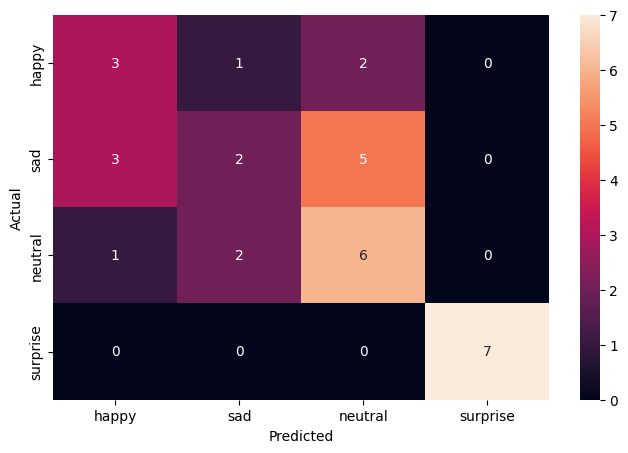

In [ ]:
# plotting confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

predBase = modelBase.predict(test_images)
predBase = np.argmax(predBase, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

print(classification_report(y_true, predBase))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, predBase)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

1/1 [==============================] - 0s 86ms/step
              precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       1.00      0.10      0.18        10
           2       0.42      0.56      0.48         9
           3       0.88      1.00      0.93         7

    accuracy                           0.59        32
   macro avg       0.71      0.66      0.57        32
weighted avg       0.72      0.59      0.53        32



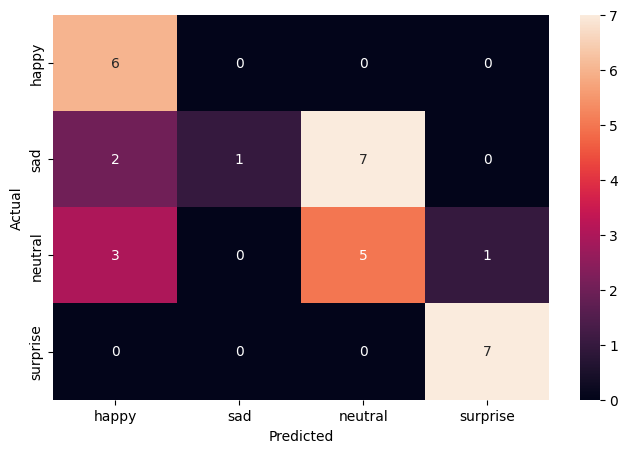

In [ ]:
# plotting confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred1 = model1.predict(test_images)
pred1 = np.argmax(pred1, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

print(classification_report(y_true, pred1))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred1)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

1/1 [==============================] - 0s 124ms/step
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.50      0.40      0.44        10
           2       0.58      0.78      0.67         9
           3       1.00      0.86      0.92         7

    accuracy                           0.69        32
   macro avg       0.73      0.72      0.72        32
weighted avg       0.70      0.69      0.68        32



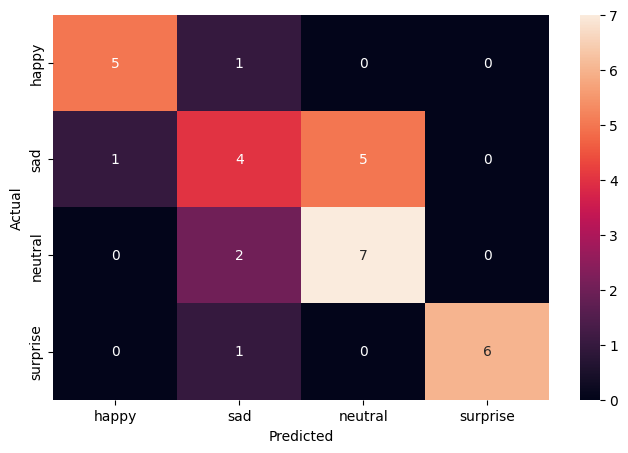

In [ ]:
# plotting confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred2 = model2.predict(test_images)
pred2 = np.argmax(pred2, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

print(classification_report(y_true, pred2))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred2)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

1/1 [==============================] - 0s 180ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.89      0.80      0.84        10
           2       0.82      1.00      0.90         9
           3       1.00      1.00      1.00         7

    accuracy                           0.91        32
   macro avg       0.93      0.91      0.91        32
weighted avg       0.91      0.91      0.91        32



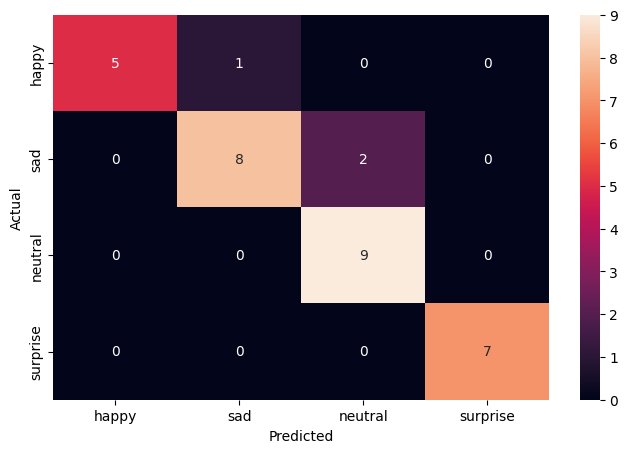

In [ ]:
# plotting confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred3 = model3.predict(test_images)
pred3 = np.argmax(pred3, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

print(classification_report(y_true, pred3))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred3)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##**Observation** and  Conclusion

In the base model, there is a lot of variation when predicting emotions. The model performed the best when it came to surprise. f1 score of 56%. In model1, it is a very simple model without the used of dropout. The model performed better than the ANN. f1 score of 59%. In model2, the model performed better than the base model and model1. f1 score of 69%. In model3, the model performed better than all other models. f1 score at 91%.

Sad as an emotion seems like the hardest to predict and be accurate on. Most models mispredict the emotion to happy or neutral. This could be because emotions are to subtle and not distinctive enough, which could lead to certain prediction that can be categorized as neutral or happy. In the base model, sad was the least accurate and mistaken strongly for neutral, and neutral was mistaken for happy. As we get to model 2 and 3, the program was able to better predict those emotions more accurately.

Increasing epochs or creating more models can lead to better prediction by allowing CNN to have more opportunities to learn and capture intricate patterns and features within the data. Training a CNN for more epochs can help it generalize better to unseen data. The model becomes more robust and less likely to overfit the training data as it has learned to extract essential features without memorizing noise or outliers, which leads to feature refinement.

Generally, it's a good practice to match the preprocessing and input format of the pre-trained model with your own data. If photos are already in grayscale (single-channel images), it's recommended to use grayscale images as inputs to the transfer learning model, rather than converting them to RGB.

When single-channel grayscale images are used as input while the pre-trained model expects RGB -- this may lead to unexpected behavior or poor performance, as the model's internal representations may not align well with grayscale data. Transforming grayscale images into RGB would not be meaningful in the significant value that it can provide. Converting grayscale images to RGB involves duplicating the same intensity value across all three color channels. This can result in loss of information and might introduce noise or artifacts that the pre-trained model is not designed to handle.